In [46]:
#this is the original model we were running

In [47]:
import numpy as np
import os
import PIL
import PIL.Image
import pandas as pd

# Setting weights to the train class_weights

In [1]:
#setting class_weights based on the class 10. 
#Essentially we treating every instance of the classes as instances of class 10
# For example weight of 4 for class 0 means: 
    #treat every instance of class 0 as 4 instances of class 10

class_weight = {0:4. ,
                1:2., 
                2:1.5 ,
                3:2.,
                4:3.,
                5:2.,
                6:1.5,
                7:4.,
                8:2.,
                9:3.,
                10:1.,
                11:4.,
                12:3.,
                13:2.,
                14:3.,
                15:2.
               }

# Loading the images into train and validation sets

Load the images

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
#setting the directory for the train dataset
directory = r"../raw_data/train"

In [41]:
#augmenting the data using : horizontal flips, adapting the horiztontal width, shear range, zooming and rotating the images
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        rotation_range=90,
        channel_shift_range=150.0,
        validation_split = 0.2)

valid_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split = 0.2)

In [42]:
img_height, img_width = (256,256)

In [43]:
train_generator = train_datagen.flow_from_directory(
    directory,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='binary',
    subset='training',
    seed = 123) # set as training data

validation_generator = valid_datagen.flow_from_directory(
    directory, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    seed = 123) # set as validation data

Found 3460 images belonging to 16 classes.
Found 857 images belonging to 16 classes.


# Training baseline model

In [44]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [8]:
num_classes = 16

model = Sequential([
  #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, input_shape=(img_height, img_width, 3),padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

In [9]:
import tensorflow.keras.losses

model.compile(optimizer='adam',
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0

In [11]:
epochs=10
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // 32,
    class_weight=class_weight,
    epochs = epochs)

Epoch 1/10
108/108 [==============================] - 102s 948ms/step - loss: 6.0234 - accuracy: 0.0767 - val_loss: 2.6886 - val_accuracy: 0.1298
Epoch 2/10
108/108 [==============================] - 99s 914ms/step - loss: 5.4349 - accuracy: 0.1709 - val_loss: 2.3380 - val_accuracy: 0.2524
Epoch 3/10
108/108 [==============================] - 97s 903ms/step - loss: 4.9514 - accuracy: 0.2719 - val_loss: 2.1307 - val_accuracy: 0.3618
Epoch 4/10
108/108 [==============================] - 98s 911ms/step - loss: 4.5481 - accuracy: 0.3136 - val_loss: 2.0764 - val_accuracy: 0.3425
Epoch 5/10
108/108 [==============================] - 96s 892ms/step - loss: 4.3389 - accuracy: 0.3398 - val_loss: 2.0419 - val_accuracy: 0.3762
Epoch 6/10
108/108 [==============================] - 97s 900ms/step - loss: 4.1620 - accuracy: 0.3553 - val_loss: 1.9418 - val_accuracy: 0.3798
Epoch 7/10
108/108 [==============================] - 97s 898ms/step - loss: 3.9824 - accuracy: 0.3874 - val_loss: 1.8470 - val_a

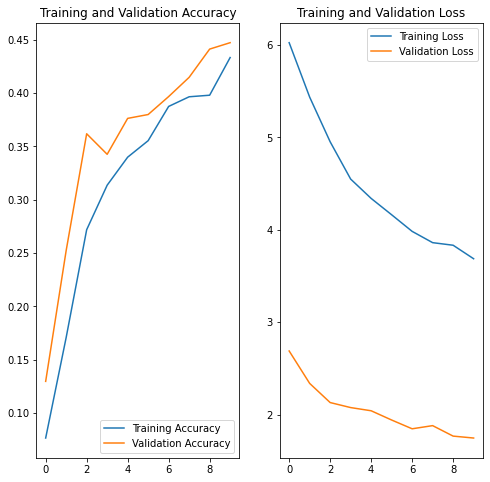

In [14]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
model.save(r'../model/cnn_1_rm')

INFO:tensorflow:Assets written to: ../model/cnn_1_rm/assets


# Checking succession rate

#### Loading test csv

In [18]:
import pandas as pd
test_df = pd.read_csv("../plantbase/data/test_data.csv").drop(columns = "Unnamed: 0")

In [19]:
test_df = test_df[['id', 'genus']]
test_df.head()

,id,genus
0,100035,Verbascum
1,100058,Trifolium
2,100186,Veronica
3,100238,Campanula
4,1003,Geranium


In [22]:
import numpy as np
columns = np.sort(test_df.genus.unique())
columns

array(['Ajuga', 'Allium', 'Campanula', 'Cirsium', 'Crataegus', 'Gentiana',
       'Geranium', 'Iris', 'Malva', 'Narcissus', 'Ophrys', 'Rosa',
       'Trifolium', 'Verbascum', 'Veronica', 'Viola'], dtype=object)

In [24]:
rename_columns = {}
col_index = 0
for n in columns:
    rename_columns[col_index] = n
    col_index += 1
    
rename_columns

{0: 'Ajuga',
 1: 'Allium',
 2: 'Campanula',
 3: 'Cirsium',
 4: 'Crataegus',
 5: 'Gentiana',
 6: 'Geranium',
 7: 'Iris',
 8: 'Malva',
 9: 'Narcissus',
 10: 'Ophrys',
 11: 'Rosa',
 12: 'Trifolium',
 13: 'Verbascum',
 14: 'Veronica',
 15: 'Viola'}

#### Loading test images using tensorflow load_img and img_to_array

In [25]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

In [26]:
X_list = []
y_list = []

for index, row in test_df.iterrows():
    img = load_img(rf"../raw_data/test/{row.id}.jpg", target_size=(256, 256))
    img = tensorflow.keras.preprocessing.image.img_to_array(img)
    #img = tensorflow.expand_dims(img, 0)
    X_list.append(img)
    y_list.append((row.genus, row.id))

In [27]:
y_true_df = pd.DataFrame(y_list, columns = ['true_genus', 'id'])
y_true_df.head()

,true_genus,id
0,Verbascum,100035
1,Trifolium,100058
2,Veronica,100186
3,Campanula,100238
4,Geranium,1003


In [28]:
X_test = np.stack(X_list, axis=0)

In [29]:
y_pred = model.predict(X_test)

In [30]:
y_pred.shape

(1341, 16)

In [31]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df = y_pred_df.rename(columns = rename_columns)
y_pred_df.head()

,Ajuga,Allium,Campanula,Cirsium,Crataegus,Gentiana,Geranium,Iris,Malva,Narcissus,Ophrys,Rosa,Trifolium,Verbascum,Veronica,Viola
0,-868.639526,-3430.237793,-418.851562,-1848.502930,-3479.267334,2006.324585,-1700.829346,2602.210938,-2131.191650,1178.074219,872.468140,-1067.980591,-2142.183838,1736.905273,-1116.729736,1273.993530
1,811.881470,-1669.261353,384.466217,-1461.457397,-1754.666504,741.158508,669.556641,457.730469,-880.900208,-1842.650146,-475.609619,-809.610596,514.520813,109.774155,468.044739,-367.740295
2,1156.775635,-682.769470,477.623169,275.231354,-1101.863647,992.339172,-523.819641,529.284302,-606.620361,-1216.446045,253.157150,-2009.803345,-579.709961,134.573013,964.426147,293.827820
3,1184.801025,-679.024658,1262.713745,1074.261841,-1967.860596,1126.404663,990.904297,413.137085,197.361572,-3300.858643,505.148834,-1418.674561,-99.919975,-912.698242,488.070099,212.801575
4,876.189026,447.751923,954.439270,587.514038,-1205.758301,16.346346,1217.676147,709.410400,905.102844,-1935.685791,695.776794,-952.715027,-84.106316,-1797.564819,98.463173,1087.852295


In [32]:
y_true = np.stack(y_list, axis = 0)

In [33]:
y_pred_df['pred_genus'] = y_pred_df.idxmax(axis = 1)
y_pred_df['pred_genus']

0            Iris
1           Ajuga
2           Ajuga
3       Campanula
4        Geranium
5       Verbascum
6          Ophrys
7            Iris
8          Ophrys
9        Geranium
10      Campanula
11       Geranium
12           Iris
13        Cirsium
14      Verbascum
15         Ophrys
16          Ajuga
17        Cirsium
18         Ophrys
19      Campanula
20          Malva
21        Cirsium
22      Campanula
23      Campanula
24           Iris
25         Ophrys
26           Iris
27         Ophrys
28           Iris
29           Iris
          ...    
1311        Malva
1312      Cirsium
1313     Gentiana
1314     Geranium
1315      Cirsium
1316      Cirsium
1317    Campanula
1318    Verbascum
1319     Geranium
1320     Gentiana
1321    Campanula
1322     Geranium
1323     Gentiana
1324       Ophrys
1325        Malva
1326     Gentiana
1327        Malva
1328         Rosa
1329     Gentiana
1330     Gentiana
1331         Rosa
1332       Ophrys
1333       Ophrys
1334    Verbascum
1335      

In [34]:
prediction_review = (y_pred_df['pred_genus'] == y_true_df['true_genus'])

In [35]:
prediction_vec_df = y_pred_df[['pred_genus']].copy()
prediction_vec_df['true_genus'] = y_true_df['true_genus'].copy()
prediction_vec_df['result'] = (y_pred_df['pred_genus'] == y_true_df['true_genus'])

In [36]:
prediction_vec_df['false'] = prediction_vec_df['result'].apply(lambda x: 1 if x == False else 0)
prediction_vec_df['true'] = prediction_vec_df['result'].apply(lambda x: 1 if x == True else 0)
prediction_vec_df.head(2)

,pred_genus,true_genus,result,false,true
0,Iris,Verbascum,False,1,0
1,Ajuga,Trifolium,False,1,0


In [37]:
true_pos_neg = prediction_vec_df.groupby('true_genus').sum().drop(columns=['result'])
true_pos_neg['percent_true'] = true_pos_neg['true'] / (true_pos_neg['true'] + true_pos_neg['false'])

In [38]:
success_ratio = round(true_pos_neg[['percent_true']]*100).sort_values(by='percent_true', ascending=False)

In [39]:
success_ratio

,percent_true
true_genus,
Gentiana,69.0
Geranium,55.0
Narcissus,55.0
Iris,53.0
Ophrys,52.0
Cirsium,50.0
Ajuga,48.0
Rosa,44.0
Verbascum,44.0
